# **Importing and installing Python Libraries**

In [32]:
# Introducing the required libraries in the project

'''
To perform various tasks such as data reading, wrangling, pre-processing,
visualization, testing, accessing databases, and ignoring warnings in Python,
we need to install and import the necessary libraries
'''


# Importing Libraries which are used to facilitate the handling and manipulation of data
import numpy as np  #importing numpy
import pandas as pd  #importing pandas
pd.options.display.max_columns = 100  #setting maximum columns to display  as 100
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import linear_model

# Importing Libraries for visualizating the data
import seaborn as sb
sb.set()
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plot
plot.rcParams["figure.figsize"] = (10,6)  #setting up  figure size
from bokeh.plotting import show, figure, output_file 

# Importing required Libraries for accessing the database
import pymysql
import sqlalchemy 
import sqlalchemy as sql_alchemy_db     
from sqlalchemy import create_engine, select, MetaData, Table, and_, Column, Integer, String, Date, Boolean
#To get imported sqlalchemy and pymysql libraries version
print("pymysql: {}".format(pymysql.__version__))
print("sqlalchemy: {}".format(sqlalchemy.__version__))

# Importing required Library for testing data
import unittest

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

pymysql: 1.4.6
sqlalchemy: 2.0.25


# **Understanding of Data**

In [110]:
#Reading  csv files and creating  pandas data frame
df_nk_ideal = pd.read_csv("ideal.csv")
df_nk_train = pd.read_csv("train.csv") 
df_nk_test = pd.read_csv("test.csv")

# **Counting  of rows and columns for each dataset i.e., train, test and ideal datasets**

In [38]:
# Finding out number of rows and columns in ideal dataframe

print('No. of rows in ideal set are:', df_nk_ideal.shape[0])
print('No. of columns in ideal set are:', df_nk_ideal.shape[1])

No. of rows in ideal set are: 400
No. of columns in ideal set are: 51


In [40]:
# Finding out number of rows and columns in train dataframe

print('No. of rows in train set are:', df_nk_train.shape[0])
print('No. of columns in train set are:', df_nk_train.shape[1])

No. of rows in train set are: 400
No. of columns in train set are: 5


In [42]:
# Finding out number of rows and columns in test dataframe

print('No. of rows in test set are:', df_nk_test.shape[0])
print('No. of columns in test set are:', df_nk_test.shape[1])

No. of rows in test set are: 100
No. of columns in test set are: 2


In [44]:
df_nk_train.head(3)

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830


In [46]:
df_nk_test.head(5)


,x,y
0,17.5,34.161040
1,0.3,1.215102
2,-8.7,-16.843908
3,-19.2,-37.170870
4,-11.0,-20.263054


In [48]:
df_nk_ideal.tail(5)

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
395,19.5,0.605540,0.795815,10.605540,5.795815,-10.605540,-0.605540,-0.947580,-0.117020,1.591630,11.808027,19.5,60.5,34.0,-19.5,-6.75,380.25,-380.25,760.50,390.25,506.25,7414.875,7414.875,-7414.875,14829.750,22249.625,9938.375,-5359.375,7434.375,7795.125,6659.375,19.5,4.415880,19.627787,1.238861,9.5,97.5,-19.5,-0.190275,380.85553,89.454185,39.302770,-38.602093,2.970414,-0.012422,12.970414,5.273000,-5.273000,0.240949,0.605540,0.714434
396,19.6,0.681964,0.731386,10.681964,5.731386,-10.681964,-0.681964,-0.930426,0.774356,1.462772,13.366487,19.6,60.8,34.2,-19.6,-6.80,384.16,-384.16,768.32,394.16,510.76,7529.536,7529.536,-7529.536,15059.072,22593.607,10077.696,-5451.776,7549.136,7913.696,6766.216,19.6,4.427189,19.727139,1.216889,9.6,98.0,-19.6,-0.049422,384.84195,91.428610,39.540980,-38.834310,2.975530,-0.012438,12.975530,5.278115,-5.278115,0.249389,0.681964,0.667902
397,19.7,0.751573,0.659649,10.751574,5.659649,-10.751574,-0.751573,-0.910947,-0.994669,1.319299,14.805996,19.7,61.1,34.4,-19.7,-6.85,388.09,-388.09,776.18,398.09,515.29,7645.373,7645.373,-7645.373,15290.746,22941.120,10218.313,-5545.233,7665.073,8033.463,6874.193,19.7,4.438468,19.826498,1.186711,9.7,98.5,-19.7,0.091924,388.84158,93.430350,39.775787,-39.070175,2.980619,-0.012453,12.980619,5.283204,-5.283204,0.247887,0.751573,0.612840
398,19.8,0.813674,0.581322,10.813674,5.581322,-10.813674,-0.813674,-0.889191,0.612391,1.162644,16.110740,19.8,61.4,34.6,-19.8,-6.90,392.04,-392.04,784.08,402.04,519.84,7762.392,7762.392,-7762.392,15524.784,23292.176,10360.232,-5639.752,7782.192,8154.432,6983.312,19.8,4.449719,19.925863,1.151609,9.8,99.0,-19.8,0.232352,392.85367,95.458680,40.006836,-39.309338,2.985682,-0.012469,12.985682,5.288267,-5.288267,0.236503,0.813674,0.549129
399,19.9,0.867644,0.497186,10.867644,5.497186,-10.867644,-0.867644,-0.865213,0.168518,0.994372,17.266117,19.9,61.7,34.8,-19.9,-6.95,396.01,-396.01,792.02,406.01,524.41,7880.599,7880.599,-7880.599,15761.198,23646.797,10503.459,-5735.339,7900.499,8276.609,7093.579,19.9,4.460942,20.025234,1.114838,9.9,99.5,-19.9,0.370458,396.87766,97.512820,40.233820,-39.551407,2.990720,-0.012484,12.990720,5.293305,-5.293305,0.215690,0.867644,0.476954


# **Information of each Dataset**

In [51]:
#To get the infomation  of each dataset

df_nk_train.info()
'''
print basic information
such as columns, non-null entries, and data types 
using in-built function
'''
df_nk_ideal.info()
df_nk_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       400 non-null    float64
 1   y1      400 non-null    float64
 2   y2      400 non-null    float64
 3   y3      400 non-null    float64
 4   y4      400 non-null    float64
 5   y5      400 non-null    float64
 6   y6      400 non-null    float64
 7   y7      400 non-null    float64
 8   y8      400 non-null    float64
 9   y9      400 non-null    float64
 10  y10     400 non-null    float64
 11  y11  

# **Describes the data frame transpose**


In [54]:
#Describing the train data frame transpose

df_nk_train.describe().T

,count,mean,std,min,25%,50%,75%,max
x,400.0,-0.050000,11.561430,-20.000000,-10.025000,-0.050000,9.925000,19.900000
y1,400.0,0.107666,23.103285,-39.724934,-20.312566,0.367844,19.606209,40.151100
y2,400.0,-0.094239,23.111794,-40.078590,-19.642560,-0.000603,19.478971,40.558865
y3,400.0,-0.051628,11.560369,-20.214268,-9.999807,-0.155205,9.992209,19.840752
y4,400.0,0.012633,0.327063,-0.744510,-0.198240,0.024634,0.236008,0.742489


In [56]:
#Describing the  test data frame

df_nk_test.describe()

,x,y
count,100.000000,100.000000
mean,0.299000,0.325483
std,12.039501,20.745993
min,-20.000000,-40.449770
25%,-9.775000,-14.091911
50%,-0.500000,-0.038432
75%,11.700000,15.968556
max,19.700000,38.955273


In [58]:
#Describing the  ideal data frame transpose
df_nk_ideal.describe().T

,count,mean,std,min,25%,50%,75%,max
x,400.0,-5.000000e-02,11.561430,-2.000000e+01,-10.025000,-5.000000e-02,9.925000,1.990000e+01
y1,400.0,-2.282363e-03,0.701386,-9.999902e-01,-0.695113,-3.981591e-03,0.689206,9.999902e-01
y2,400.0,4.560922e-02,0.713074,-9.999683e-01,-0.669387,9.586751e-02,0.753902,1.000000e+00
y3,400.0,9.997718e+00,0.701386,9.000010e+00,9.304887,9.996018e+00,10.689206,1.099999e+01
y4,400.0,5.045609e+00,0.713074,4.000032e+00,4.330613,5.095868e+00,5.753902,6.000000e+00
y5,400.0,-9.997718e+00,0.701386,-1.099999e+01,-10.689206,-9.996018e+00,-9.304887,-9.000010e+00
y6,400.0,2.282363e-03,0.701386,-9.999902e-01,-0.689206,3.981591e-03,0.695113,9.999902e-01
y7,400.0,-5.439078e-02,0.721907,-9.999647e-01,-0.801144,-9.587089e-02,0.672522,1.000000e+00
y8,400.0,3.072600e-02,0.717805,-9.999979e-01,-0.672318,3.880327e-02,0.775285,9.999931e-01
y9,400.0,9.121843e-02,1.426147,-1.999937e+00,-1.338774,1.917350e-01,1.507804,2.000000e+00


# **Visual Representation of data**

In [61]:
#Definating the function hist_box_plot for combinating  histogram and boxplot

def hist_box_plot(df_nk_test,col):
  f, (ax_box, ax_hist) = plot.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(10,6), dpi=100)
  # Adding a graph in test dataset
  sb.boxplot(df_nk_test[col], ax=ax_box, showmeans=True)
  sb.distplot(df_nk_test[col], ax=ax_hist)
  plot.show()

# **Visualization of Single variable**

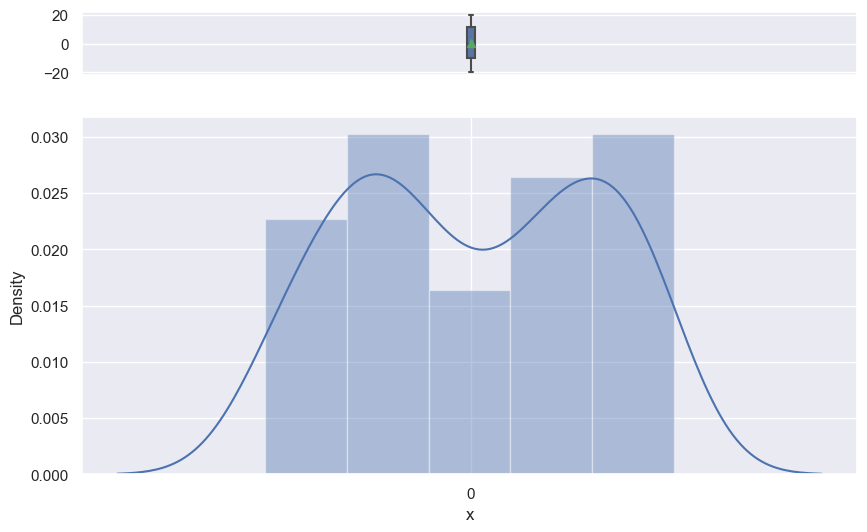

In [64]:
# Visualising hist_box_plot for x variable in test set
'''
Visualize single variable
of a test dataset
'''
hist_box_plot(df_nk_test,'x')

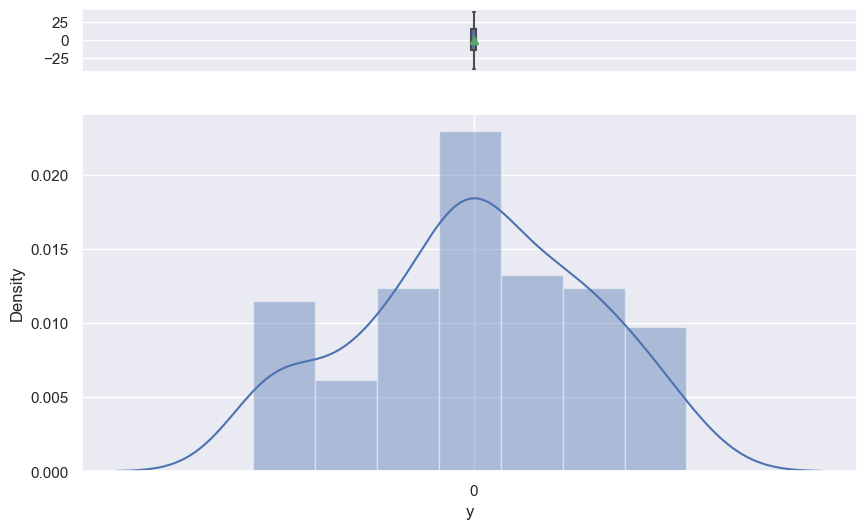

In [65]:
# Visualizing hist_box_plot for y variable in test set

hist_box_plot(df_nk_test,'y')

# **Visualizing of two variables**

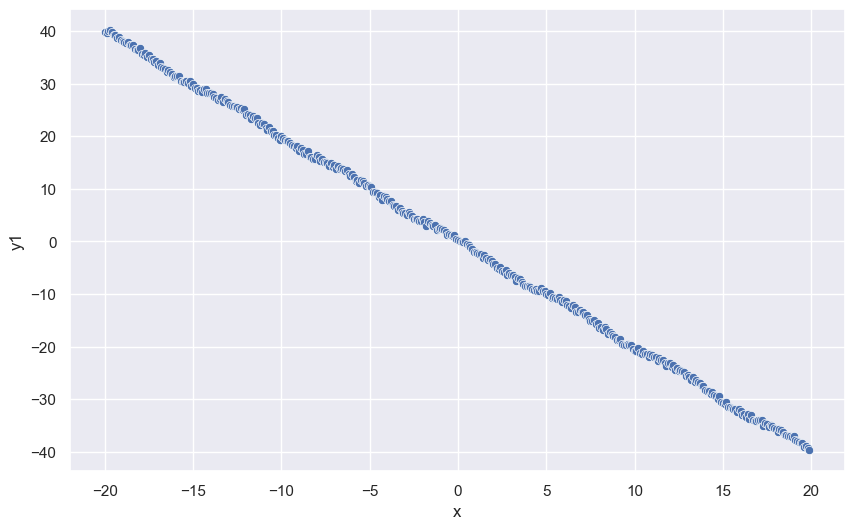

In [68]:
# Using Scatterplot to observe distribution of y1 variable in train set
'''
Visualization of  two variables
in  train dataset
'''
sb.scatterplot(data=df_nk_train, x='x', y='y1')
plot.show()

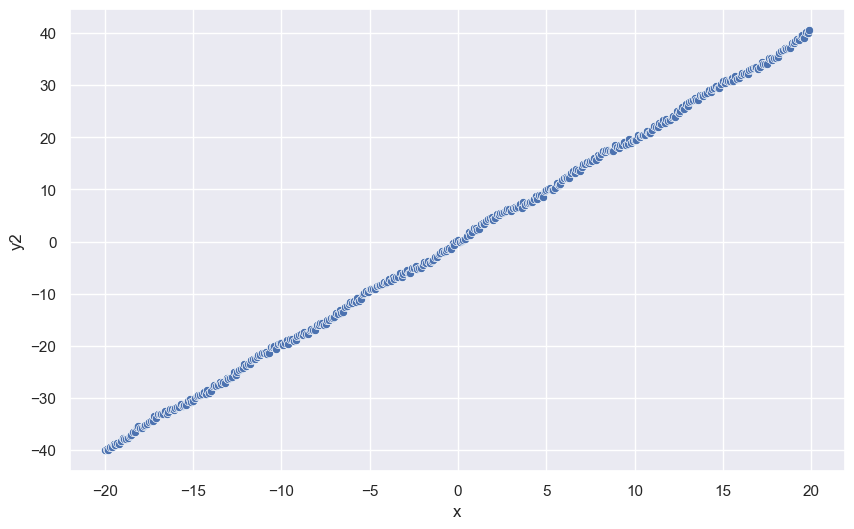

In [70]:
#Using Scatterplot to observe distribution of y2 variable in train set

sb.scatterplot(data=df_nk_train,x='x', y='y2')
plot.show()

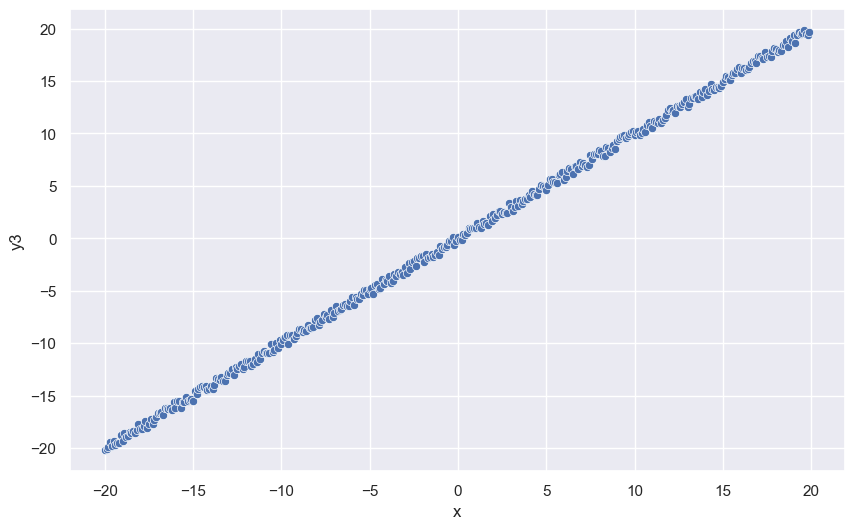

In [72]:
#Using Scatterplot to observe distribution of y3 variable in train set

sb.scatterplot(data=df_nk_train,x='x', y='y3')
plot.show()

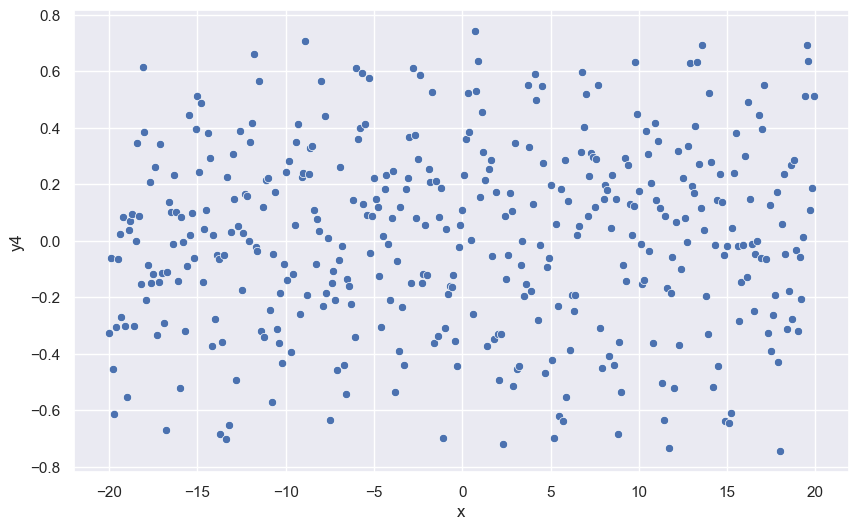

In [74]:
#Using Scatterplot to observe distribution of y4 variable in train set

sb.scatterplot(data=df_nk_train,x='x', y='y4')
plot.show()

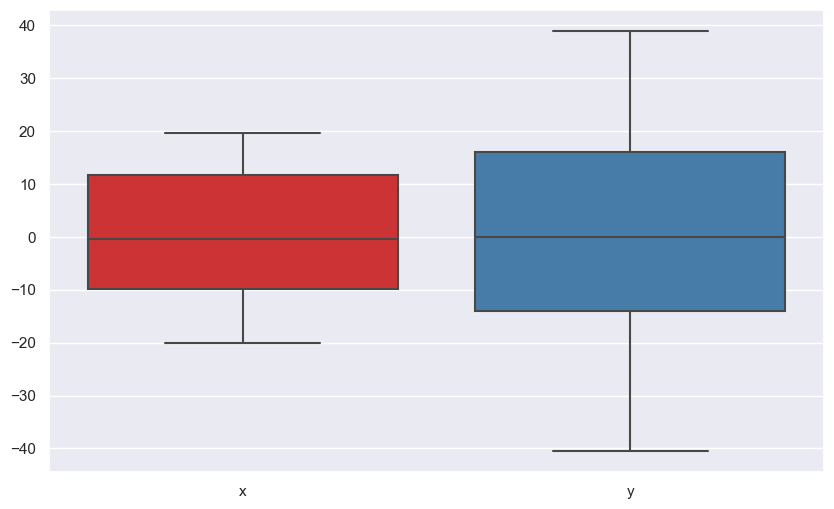

In [75]:
#Obtain the boxplot of test set

sb.boxplot(data=df_nk_test, palette="Set1")
plot.show()

 # **Visualization of Multiple variables**

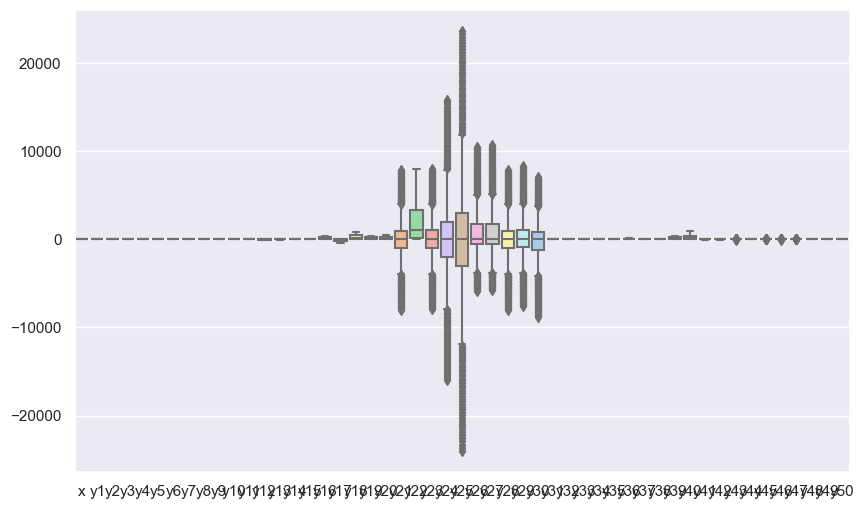

In [80]:
#Obtaining  the Boxplot of train set
'''
Visualizating muliple variables
of an ideal dataset
'''

sb.boxplot(data=df_nk_ideal, palette="pastel")
plot.show()

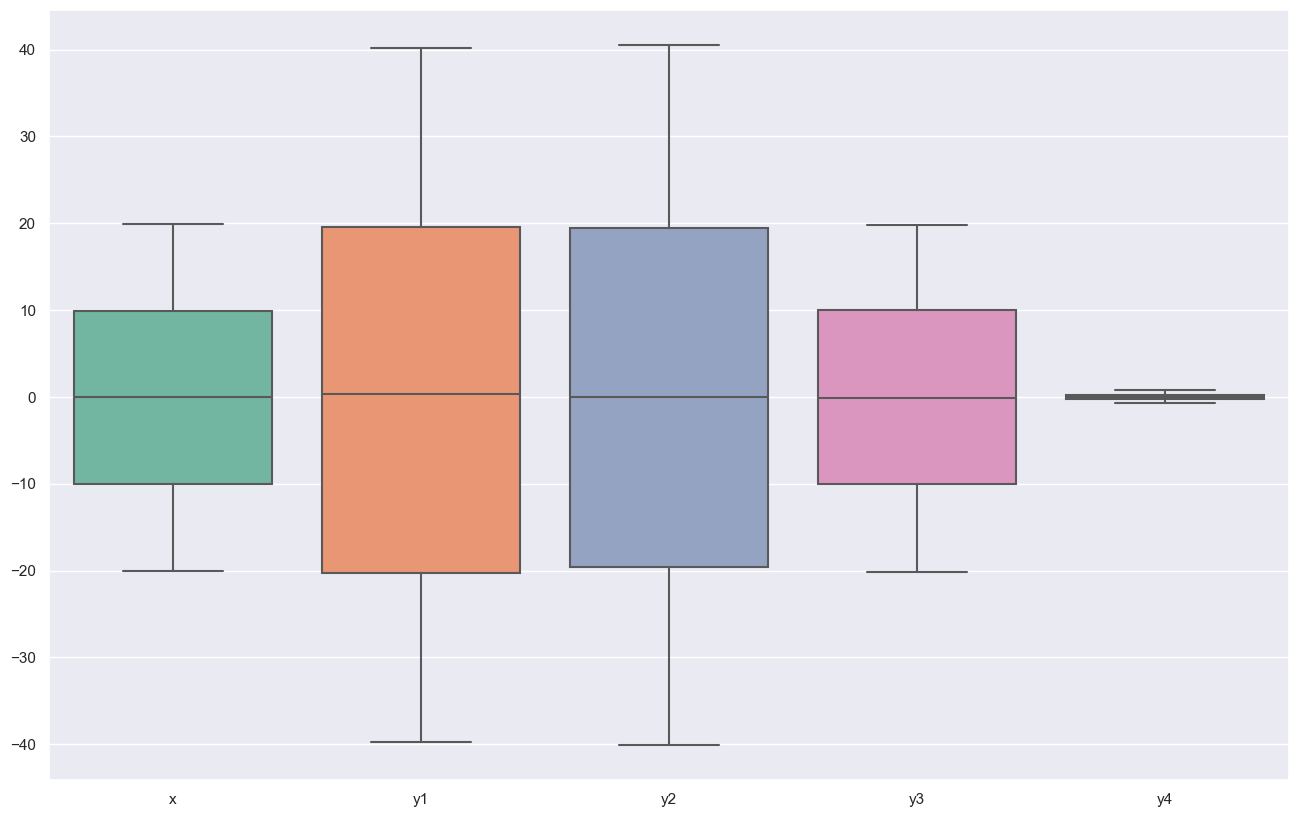

In [81]:
#Obtain the Boxplot of ideal set
'''
Visualizing  multiple variables
of a train dataset
'''
plot.figure(figsize=(16,10))
sb.boxplot(data=df_nk_train, palette="Set2")
plot.show()

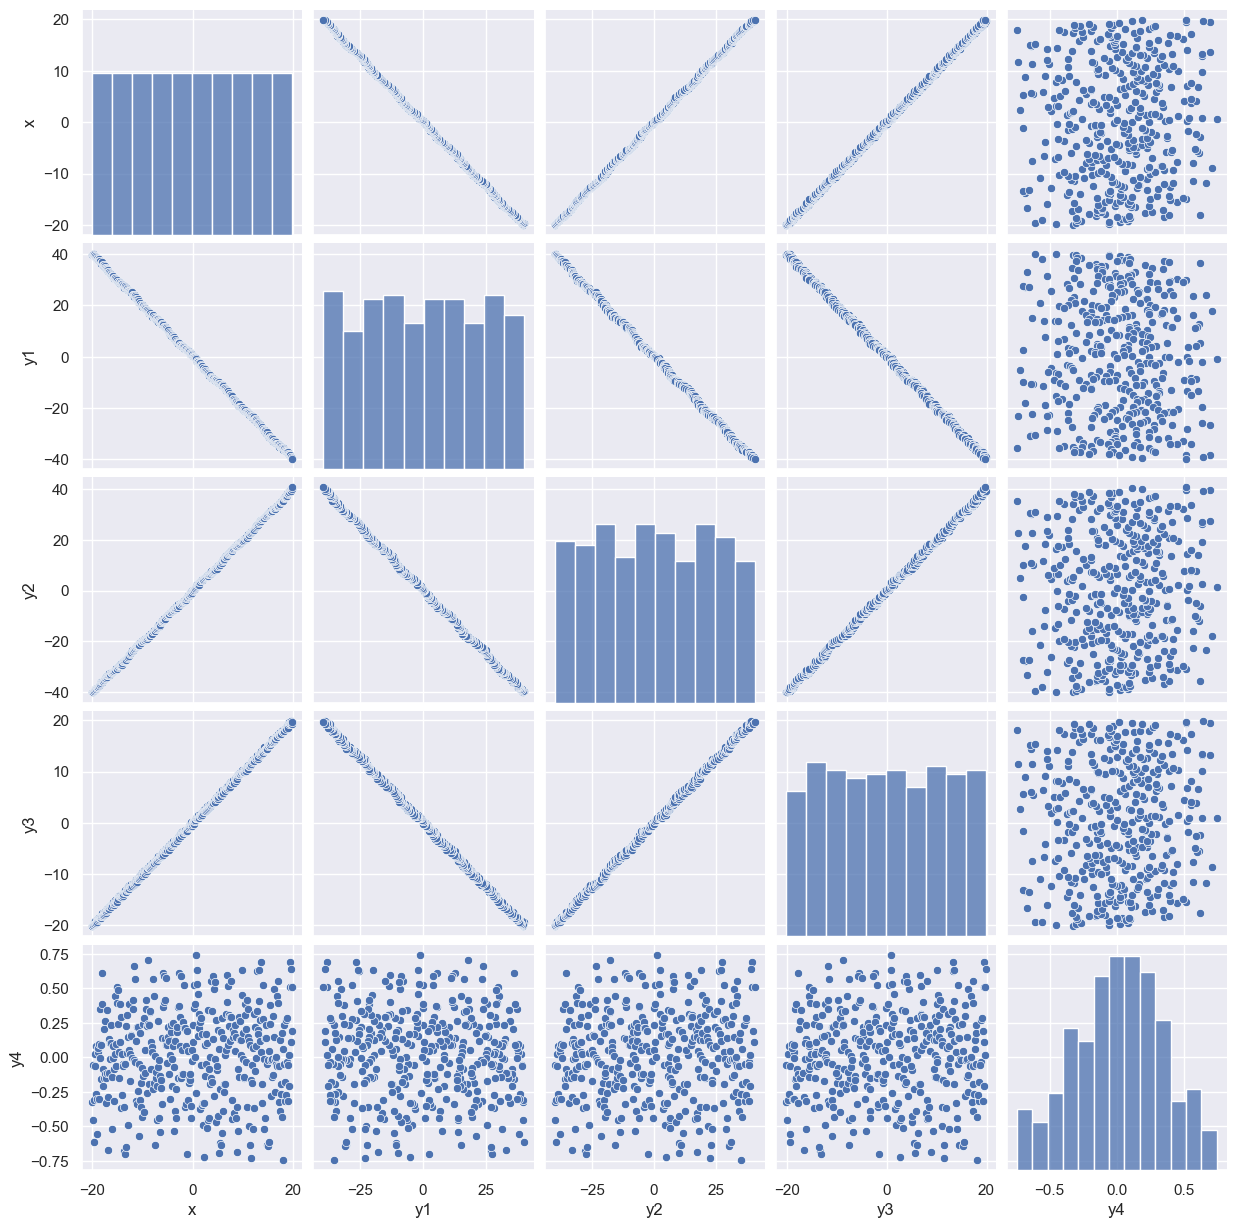

In [84]:
#To obtain a single graph that encompasses the entire training dataset while examining a pair of variables simultaneously.
sb.pairplot(df_nk_train)
plot.show()

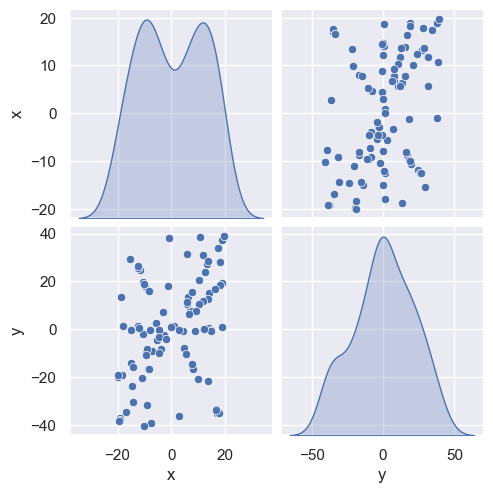

In [85]:
#To obtain a single graph that encompasses the entire test dataset while examining a pair of variables simultaneously.

sb.pairplot(df_nk_test, diag_kind="kde")
plot.show()

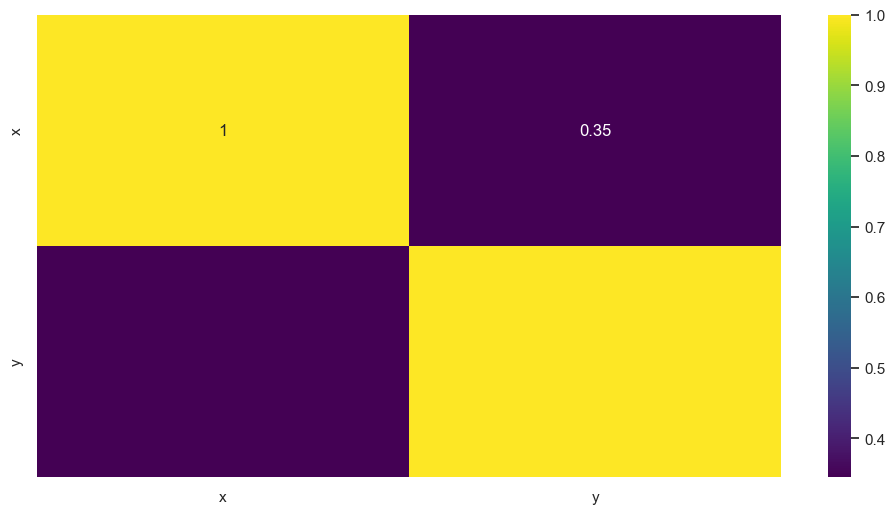

In [86]:
#A heatmap can be used to visualize the correlation between each variable in a test set relative to the other variables.

plot.figure(figsize=(12,6))
sb.heatmap(df_nk_test.corr(), annot = True, cmap = "viridis")
plot.show()

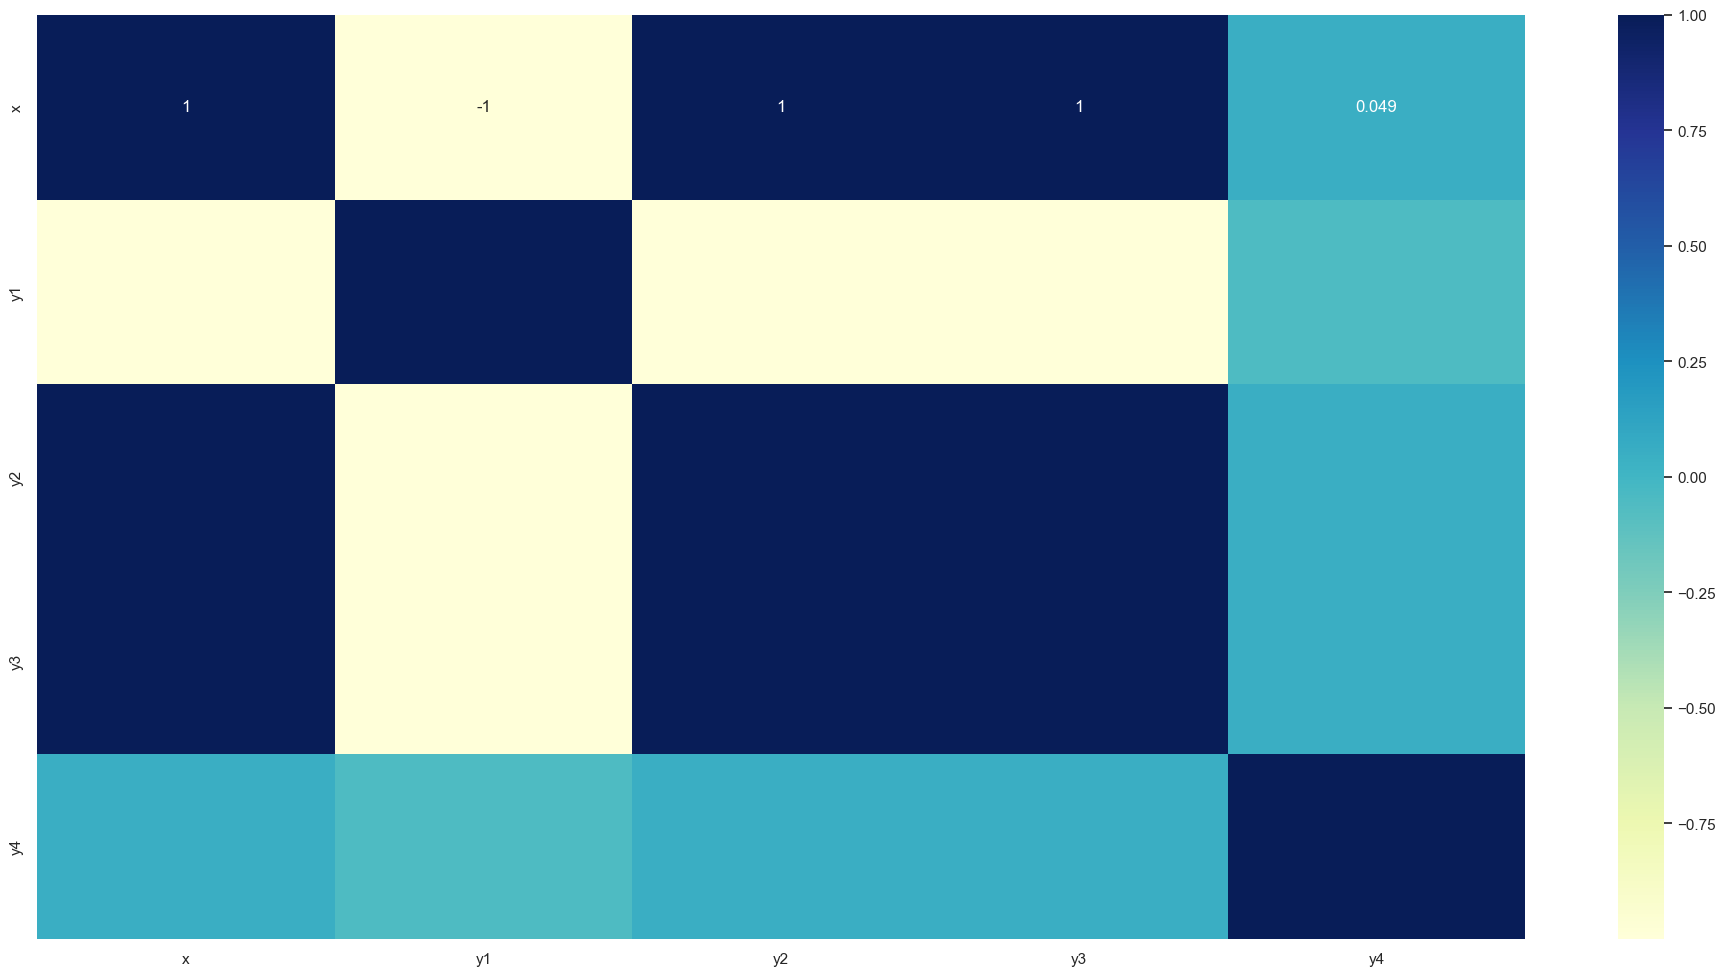

In [87]:
#A heatmap can be used to visualize the correlation between each variable in a train set relative to the other variables.

plot.figure(figsize=(24,12))
sb.heatmap(df_nk_train.corr(), annot = True, cmap = "YlGnBu")
plot.show()

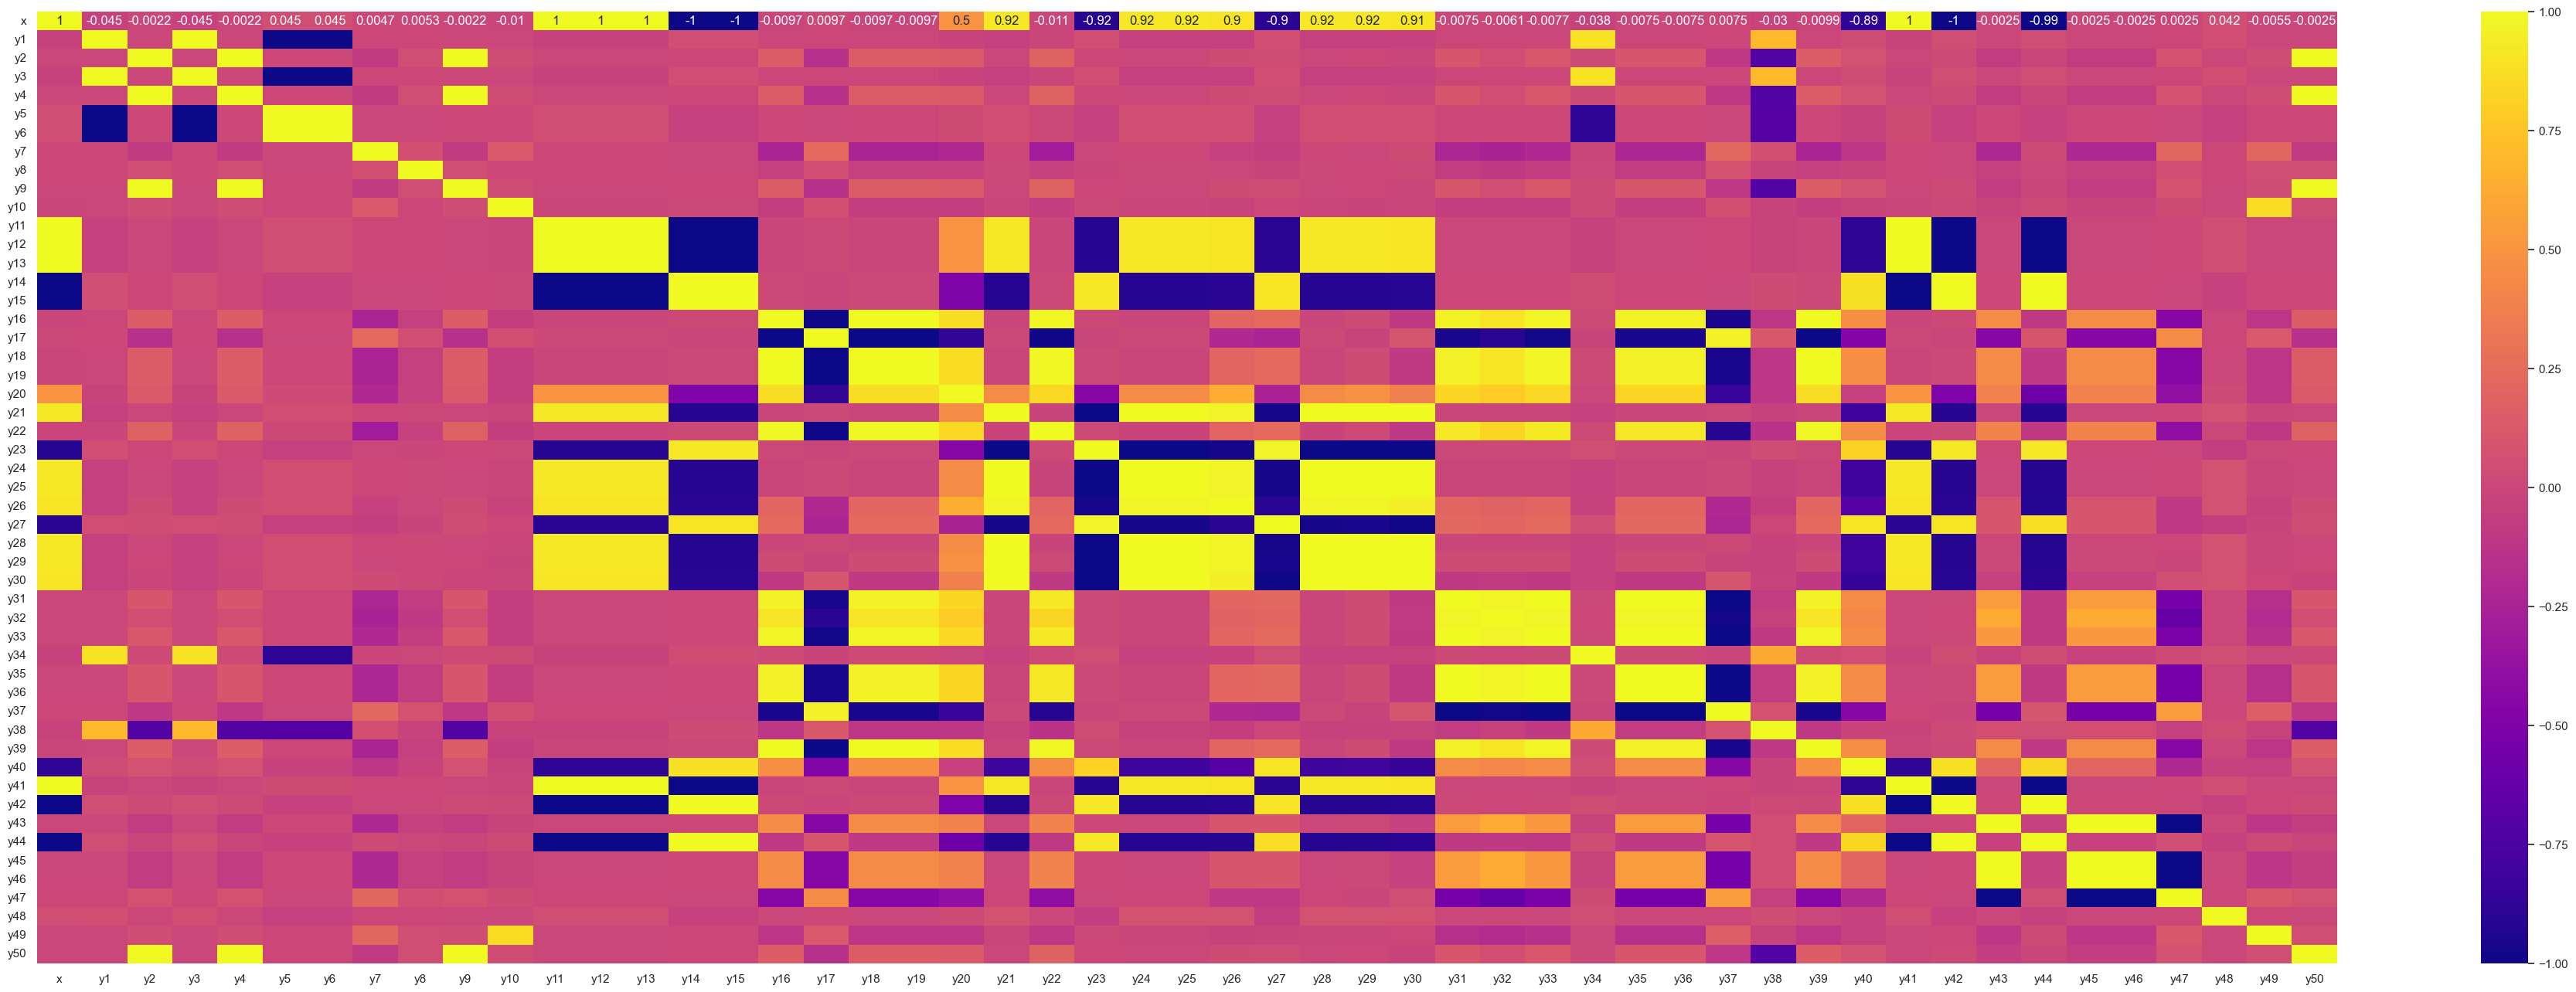

In [88]:
#A heatmap can be used to visualize the correlation between each variable in an ideal set relative to the other variables.

plot.figure(figsize=(48,16)) # define size of figure for optimum view
sb.heatmap(df_nk_ideal.corr(), annot = True, cmap = "plasma")
plot.show()

# **Data Processing**

In [95]:
# Defining function mean_square_error() to get the Mean Square Error

'''
function mean_square_error to predict error between 
labels and predictions as two variables
'''

def mean_square_error_train_ideal(predictions, labels):
    error_term = (np.sum(np.square(predictions-labels)))/len(predictions)
    return error_term

# **Error and Exception Handling**

In [98]:
 #Python code that demonstrates the functionality of try, except, else, and finally blocks.

'''
Try: This block will test the excepted error to occur
Except:  Here you can handle the error
Else: If there is no exception then this block will be executed
Finally: Finally block always gets executed either exception is generated or not
'''

try:
    result_data_mse = mean_square_error_train_ideal(np.array(list(df_nk_train.y2)), np.array(list(df_nk_ideal.y52)))
    
except:
    print("Input variables are not valid!")

else:
    print("The Mean Square Error(MSE) for given variable is: ", result_data_mse)
    
finally: 
    '''
    this block is always executed  
    regardless of exception generation.
    '''
    print('This is always executed')

Input variables are not valid!
This is always executed


In [100]:
# Modifying  the parameter values and observing  how the functionality works

'''
Try: This block will test the excepted error to occur
Except:  Here we can handle the error
Else: If there is no exception then this block will be executed
Finally: Finally block always gets executed either exception is generated or not
'''

try:
    result_data_mse = mean_square_error_train_ideal(np.array(list(df_nk_train.y1)), np.array(list(df_nk_ideal.y4)))
    
except:
    print("Input variables are not valid!")

else:
    print("The Mean Square Error(MSE) for given variable is: ", result_data_mse)
    
finally: 
    '''
    Irrespective of whether an exception is generated or not,
    this block is executed without fail.
    '''
    print('This is always executed')

The Mean Square Error(MSE) for given variable is:  556.7258002213116
This is always executed


In [102]:
# Defining an Object

df_nk_ideal.columns # object to obtain the columns of ideal dataset

Index(['x', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11',
       'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21',
       'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30', 'y31',
       'y32', 'y33', 'y34', 'y35', 'y36', 'y37', 'y38', 'y39', 'y40', 'y41',
       'y42', 'y43', 'y44', 'y45', 'y46', 'y47', 'y48', 'y49', 'y50'],
      dtype='object')

In [104]:
# Generating  list of error values by utilizing a for  loop

list_error = []
for ideal_column in list(df_nk_ideal.columns)[1:]:
    '''
        Utilizes a 'for' loop to append error values 
        to a list for both the training and ideal sets
    '''
    the_prediction_ = np.array(list(df_nk_train.y1))
    the_label_ =  np.array(list(df_nk_ideal[ideal_column]))
    the_mse_error = mean_square_error_train_ideal(the_prediction_,the_label_)
    label_error_tuple = ideal_column, the_mse_error
    list_error.append(label_error_tuple)

In [106]:
# Defining built-in function and showcasing the application of a lambda function.

def sorted_tuple(tupl):
    '''
        This Python program utilizes the sorted() function
        to sort a list of tuples based on second item. 
        The sort order is ascending since reverse = None. 
        The sorting key is set to the second element of 
        each sublist, and a lambda function is used for this purpose.
     '''
    return(sorted(tupl, key = lambda x: x[1]))

In [108]:
# sorted_tuple function output

sorted_error_list = sorted_tuple(list_error)
'''
    Outputs the first three variables 
    from the ideal set that have the lowest 
    mean squared error with respect to y1 of the training set
'''
sorted_error_list[0:3]

[('y42', 0.08561648575842126),
 ('y14', 132.99371298082846),
 ('y15', 307.88660385781895)]

In [112]:
 #Defining another function to find lowest MSE

def mse_label_lowest(train_feature, data):
    ''' 
        Create a new function that identifies 
        and lists the minimum MSE values for 
        each variable in the training data
    '''
    list_error = []
    for i in list(data.columns[1:]):
        the_prediction = np.array(list(data[i]))
        the_label = np.array(list(df_nk_train[train_feature]))
        the_error = mean_square_error_train_ideal(the_prediction, the_label)
        error_tuple= i, the_error
        list_error.append(error_tuple)

    list_error_sorted = sorted_tuple(list_error)
    return list_error_sorted[0]

the_best_label_list = []
for train_column in list(df_nk_train.columns)[1:]:
    the_best_label = mse_label_lowest(train_column,df_nk_ideal)
    the_best_label_list.append(the_best_label)
    
the_best_label_list

[('y42', 0.08561648575842126),
 ('y41', 0.0890046173120288),
 ('y11', 0.07465457572540955),
 ('y48', 0.07990858581972925)]

In [48]:
# Function for mapping train and test data

def mapping_best_label(train_data, ideal_data):
    ''' 
        Map a function into a dictionary to obtain the 
        least Mean Squared Error (MSE) values for every 
        variable in the training dataset, in relation to 
        the test dataset.
    '''
    the_best_label_list = []
    for train_column in list(df_nk_train.columns)[1:]:
        the_best_label = mse_label_lowest(train_column,df_nk_ideal)
        the_best_label_list.append(the_best_label)
    column_list = list(df_nk_train.columns)[1:]
    #utilize the zip() in-built function to create key value pair of a dictionary and iterate it
    return dict((zip(column_list,the_best_label_list ))) 

dict_error_mapping= mapping_best_label(df_nk_train, df_nk_ideal)
dict_error_mapping

{'y1': ('y42', 0.08561648575842126),
 'y2': ('y41', 0.0890046173120288),
 'y3': ('y11', 0.07465457572540955),
 'y4': ('y48', 0.07990858581972925)}

# **Implementing Class and Inheritance to Determine ideal Function**

In [50]:
class extract_best_features:
    '''
        Create a class that identifies the 
        optimal feature from the training and test datasets
    '''
    def __init__(self_input, input_train_data, input_ideal_data):
        self_input.train_length = input_train_data.shape[0]
        self_input.ideal_length = input_ideal_data.shape[0]
        self_input.train_target_feat = list(input_train_data.columns[1:])
        self_input.ideal_target_feat = list(input_ideal_data.columns[1:])
        self_input.ideal_target_data = df_nk_ideal.iloc[0:,1:]
        self_input.train_target_data = df_nk_train.iloc[0:, 1:]
        self_input.ideal_feat_pred = df_nk_ideal.iloc[0:, 0:1]
        self_input.train_feat_pred = df_nk_train.iloc[0:, 0:1]
        
    def mse_label_lowest(self_input, train_feature):
        '''
        Define a separate function 
        to list the error values for each 
        variable in both the train and test sets
        '''
        list_error = []
        for i in self_input.ideal_target_feat:
            the_prediction = np.array(list(self_input.ideal_target_data[i]))
            the_label = np.array(list(self_input.train_target_data[train_feature]))
            the_error = mean_square_error_train_ideal(the_prediction, the_label)
            label_error_tuple= i, the_error
            list_error.append(label_error_tuple)

        list_error_sorted = sorted_tuple(list_error)
        return list_error_sorted[0]
    
class get_lowest_mse(extract_best_features):
    '''
        Class inheritance can be defined by using
        'extract_best_features' as the parent class
        and creating a child class that finds the lowest
        mean squared error (MSE) between the training and 
        test datasets
    '''
    def lowest_mse_of_all_labels(self_input):
        the_best_label_list = []
        for train_column in self_input.train_target_feat:
            the_best_label = self_input.mse_label_lowest(train_column)
            the_best_label_list.append(the_best_label)
        column_list = self_input.train_target_feat
    
        return dict((zip(column_list,the_best_label_list )))

class_object = get_lowest_mse(df_nk_train, df_nk_ideal)
class_object.lowest_mse_of_all_labels()

{'y1': ('y42', 0.08561648575842126),
 'y2': ('y41', 0.0890046173120288),
 'y3': ('y11', 0.07465457572540955),
 'y4': ('y48', 0.07990858581972925)}

# **Verify the Ideal Function by Applying the Rule of Maximum Deviation**

In [51]:
 #Determining the maximum acceptable deviation for each variable
def maxdeviation(input_predictions, input_labels):
    '''
        A function designed to determine 
        the absolute maximum difference between 
        predicted and actual labels
    '''
    maxdeviation = np.max(np.abs((input_predictions-input_labels)))
    return maxdeviation

# **Unit Testing**

In [52]:
# Implementing a class for MathOperation that defines Addition function

'''
Python unittest is a built-in testing framework to test Python code. 
It has a test runner, which allows us to run the tests without much effort. 
So, we can use the built-in unittest module for testing without using the third-party modules. 
'''

class MathOp(object):
    def add(self, var1, var2):
        '''
        To obtain math addition
        var1: first variable
        var2: second variable
        return: addition of first and second variables
        '''
        result_var = var1 + var2
        return result_var

# Use MathOp class to check unit test    
class UnitTestMathOp(unittest.TestCase):
    def test_addition(self):
        '''
        testing of math addition
        '''
        math_op = MathOp()
        result_var = math_op.add(0.7, 0.5)
        self.assertEqual(result_var, 1.2, "The result of addition should be 12")

if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [53]:
# Maximum deviation allowed for 'y1' variable 
max_devi_1 = maxdeviation(np.array(list(df_nk_train.y1)),np.array(list(df_nk_ideal.y42))) * np.sqrt(2)
print('Maximum deviation allowed for y1 variable is', max_devi_1)

# Maximum deviation allowed for 'y2' variable 
max_devi_2 = maxdeviation(np.array(list(df_nk_train.y2)),np.array(list(df_nk_ideal.y41))) * np.sqrt(2)
print('Maximum deviation allowed for y2 variable is', max_devi_2)

# Maximum deviation allowed for 'y3' variable 
max_devi_3 = maxdeviation(np.array(list(df_nk_train.y3)),np.array(list(df_nk_ideal.y11))) * np.sqrt(2)
print('Maximum deviation allowed for y3 variable is', max_devi_3)

# Maximum deviation allowed for 'y4' variable 
max_devi_4 = maxdeviation(np.array(list(df_nk_train.y4)),np.array(list(df_nk_ideal.y48))) * np.sqrt(2)
print('Maximum deviation allowed for y4 variable is', max_devi_4)

Maximum deviation allowed for y1 variable is 0.7014046721030611
Maximum deviation allowed for y2 variable is 0.7038583326337785
Maximum deviation allowed for y3 variable is 0.7056020579561832
Maximum deviation allowed for y4 variable is 0.7067413342598947


# **Using Data Visualization to Determine the ideal Function for Variables**

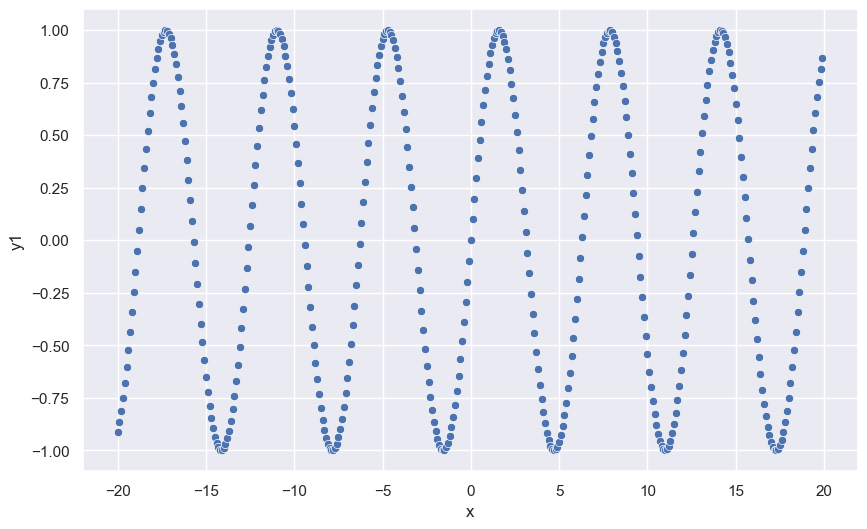

In [54]:
# A scatter plot can be used to visualize the distribution of ideal data

sb.scatterplot(data = df_nk_ideal, x = 'x', y = 'y1')
plot.show()

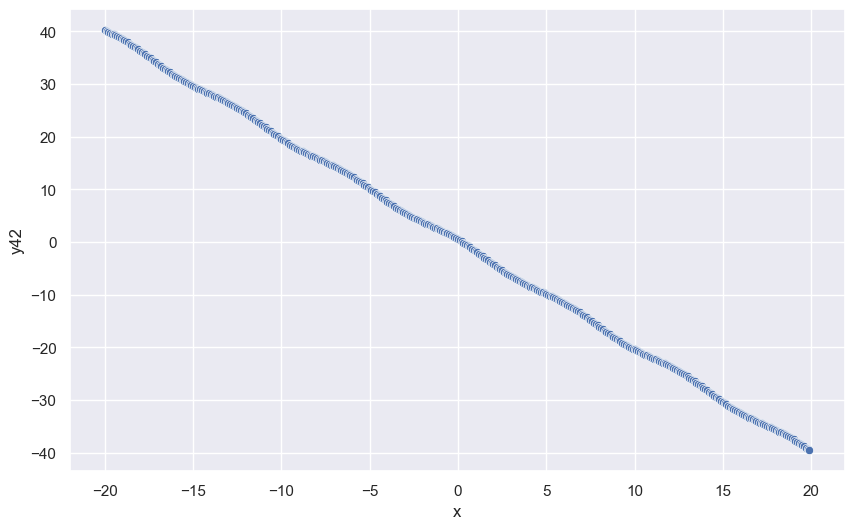

In [55]:
# A scatter plot can be used to visualize the distribution of y42 variable of ideal dataset

sb.scatterplot(data = df_nk_ideal, x = 'x', y = 'y42')
plot.show()

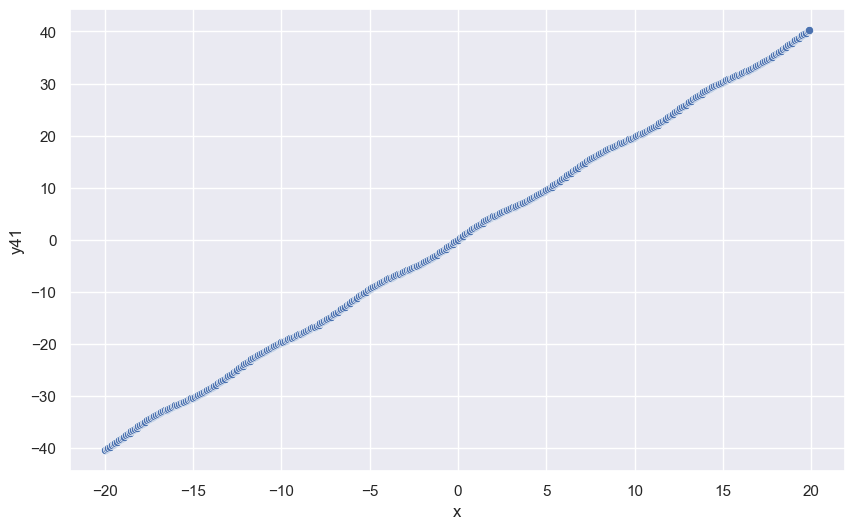

In [56]:
# A scatter plot can be used to visualize the distribution of y41 variable of ideal dataset

sb.scatterplot(data = df_nk_ideal, x = 'x', y = 'y41')
plot.show()

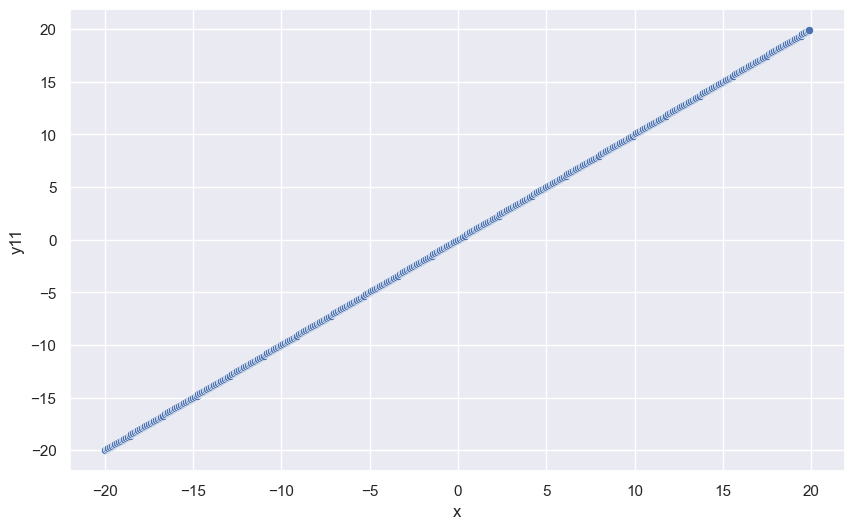

In [57]:
# A scatter plot can be used to visualize the distribution of y11 variable of ideal dataset

sb.scatterplot(data = df_nk_ideal, x = 'x', y = 'y11')
plot.show()


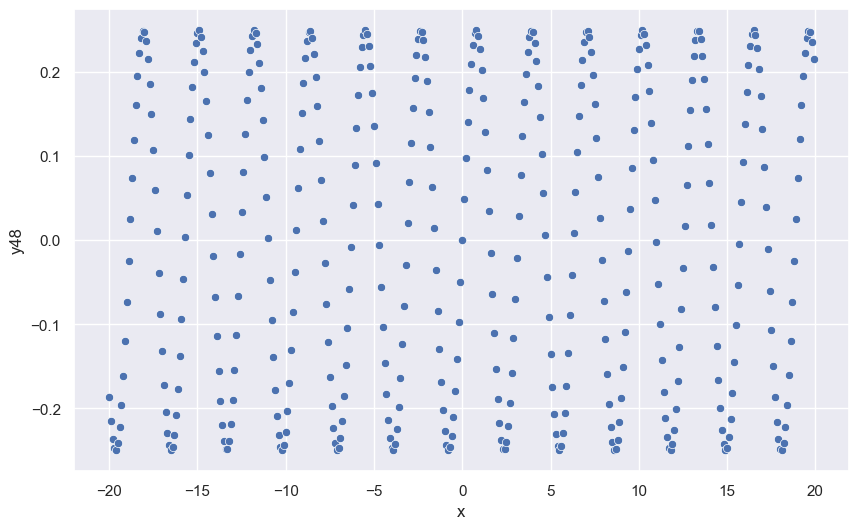

In [58]:
# A scatter plot can be used to visualize the distribution of y48 variable of ideal dataset

sb.scatterplot(data = df_nk_ideal, x = 'x', y = 'y48') 
plot.show()

#  **Deviation of Test Data from Optimal Ideal Function**

In [9]:
#Mapping of test data on a copy of df_test
test_var = df_nk_test.copy() #To copy df_test

# Applying the ideal function y42 to the test set

mapping_y42 = dict(df_nk_ideal[['x','y42']].values)
test_var['y42'] = test_var.x.map(mapping_y42)

NameError: name 'df_nk_test' is not defined

In [60]:
# Applying the ideal function y41 to the test set

mapping_y41 = dict(df_nk_ideal[['x','y41']].values)
test_var['y41'] = test_var.x.map(mapping_y41)

In [5]:
# Applying the ideal function y11 to the test set

mapping_y11 = dict(df_nk_ideal[['x','y11']].values)
test_var['y11'] = test_var.x.map(mapping_y11)

NameError: name 'df_nk_ideal' is not defined

In [7]:
# Applying the ideal function y48 to the test set

mapping_y48 = dict(df_nk_ideal[['x','y48']].values)
test_var['y48'] = test_var.x.map(mapping_y48)

NameError: name 'df_nk_ideal' is not defined

In [ ]:
test_var.head() #display top 5 values of new dataframe

In [64]:
# Computing R-squared value for the relationship between y42 and y

r_42 = test_var['y'].corr(test_var['y42'])

r2_42 = r_42**2

r2_42.round(3) # Rounding the result to three significant digits

0.117

In [65]:
# Computing R-squared value for the relationship between y41 and y

r_41 = test_var['y'].corr(test_var['y41'])

r2_41 = r_41**2

r2_41.round(3) # Rounding the result to three significant digits

0.12

In [66]:
# Computing R-squared value for the relationship between y11 and y

r_11 = test_var['y'].corr(test_var['y11'])

r2_11 = r_11**2

r2_11.round(3) # Rounding the result to three significant digits

0.12

In [67]:
# Computing the R-squared value for the relationship between y48 and y

r_48 = test_var['y'].corr(test_var['y48'])

r2_48 = r_48**2

r2_48.round(3) # Rounding the result to three significant digits

0.004

# **Based on the R-squared values, y42 is the best fit ideal function with a r2_42 = 0.117**

In [68]:
# mapping ideal function y42 on original df_test and add column of same

mapping = dict(df_nk_ideal[['x','y42']].values) 
df_nk_test['y42'] = df_nk_test.x.map(mapping) #use .map() function
df_nk_test.head()

,x,y,y42
0,17.5,34.161040,-34.890280
1,0.3,1.215102,-0.122332
2,-8.7,-16.843908,17.025677
3,-19.2,-37.170870,38.869610
4,-11.0,-20.263054,22.002213


In [69]:
# Including a column that indicates the deviation of y42 in relation to y

df_nk_test['deviation'] = abs(df_nk_test.y - df_nk_test.y42)
df_nk_test.tail()

,x,y,y42,deviation
95,-1.9,-4.036904,3.638355,7.675260
96,12.2,-0.010358,-23.933184,23.922826
97,16.5,-33.964134,-33.351200,0.612934
98,5.3,-10.291622,-10.322813,0.031191
99,17.9,28.078455,-35.508976,63.587431


In [70]:
df_nk_test.describe()  # Presenting the statistical features of the updated test data frame in a tabular format

,x,y,y42,deviation
count,100.000000,100.000000,100.000000,100.000000
mean,0.299000,0.325483,-0.569559,28.528572
std,12.039501,20.745993,24.039921,22.993615
min,-20.000000,-40.449770,-39.070175,0.031191
25%,-9.775000,-14.091911,-23.076202,7.757546
50%,-0.500000,-0.038432,1.385076,25.795988
75%,11.700000,15.968556,19.084229,45.333512
max,19.700000,38.955273,40.204040,78.025448


# **To create a visualization of the best ideal function with deviation using Bokeh**


In [71]:
# Generating  a plot that compares the test variable, ideal variable, and the deviation between them
fig = figure(width = 600 , height = 600)
fig = figure(title = "Scatter plot of updated test dataset")
fig.xaxis.axis_label = 'x-variable'
fig.yaxis.axis_label = 'y-variable'
 
# Representing the points as circular glyphs in a plot
fig.circle(df_nk_test.x, df_nk_test.y, color = "yellow", legend_label = "y", size = 20)
 
# Representing the points as square glyphs in a plot
fig.square(df_nk_test.x, df_nk_test.y42, color = "blue", legend_label = "y42", size = 15, alpha = 0.5)
 
# Representing the points as hex glyphs in a plot
fig.hex(df_nk_test.x, df_nk_test.deviation, color = "green", legend_label = "Deviation", size = 10, alpha = 0.7)

# displaying the plot mentioned above
fig.scatter(source=df_nk_test)
show(fig)

 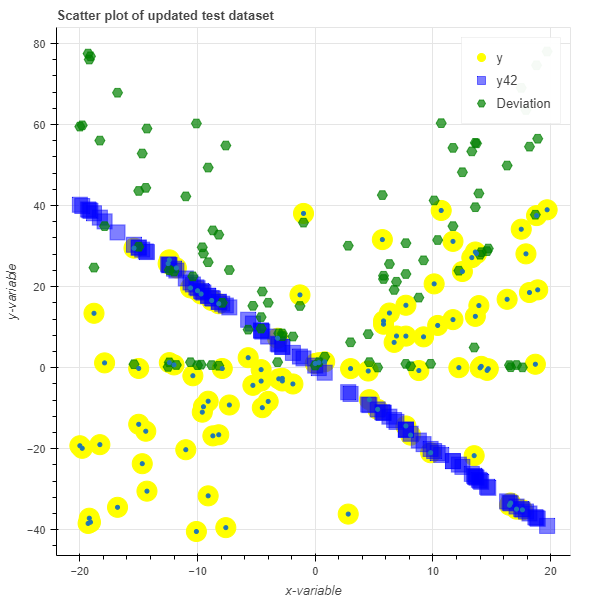


# **Connecting to mysql database**


In [72]:
from sqlalchemy.engine import URL
#creating url_object to create a connection to database

url_object = URL.create(
    "mysql+mysqlconnector",
    username="root",
    password="System",  # plain (unescaped) text
    host="localhost",
    port="3306",
    database="python_project",
)

In [73]:
# Create engine to connect to the database and check the connection
mysql_connector_engine = create_engine(url_object)
# get connection object
sql_connection = mysql_connector_engine.connect()

# **To get the metadata of the database**

In [75]:
# genarating  meta data object

meta_data = sql_alchemy_db.MetaData()

# **Creating tables in the database and extracting data from them**

In [77]:
# Copy 'test' pandas dataframe and convert it to_sql
test_data = pd.read_csv(r"C:\Users\namrk\Documents\Python Project\test.csv") # load pandas df
test_data.to_sql('test_df', con = mysql_connector_engine, index = False) # convert it to sql

# Read 'test' sql table in pandas
df_nk_test = pd.read_sql_table('test_df', con = sql_connection)
print(df_nk_test)

       x          y
0   17.5  34.161040
1    0.3   1.215102
2   -8.7 -16.843908
3  -19.2 -37.170870
4  -11.0 -20.263054
..   ...        ...
95  -1.9  -4.036904
96  12.2  -0.010358
97  16.5 -33.964134
98   5.3 -10.291622
99  17.9  28.078455

[100 rows x 2 columns]


In [78]:
# Creating 'train' pandas dataframe and convert it to_sql
train_data = pd.read_csv(r"C:\Users\namrk\Documents\Python Project\train.csv") # load pandas df
train_data.to_sql('train_df', con = mysql_connector_engine, index = False) # convert it to sql

# Read 'train' sql table in pandas
df_nk_train = pd.read_sql_table('train_df', con = sql_connection)
print(df_nk_train)

        x         y1         y2         y3        y4
0   -20.0  39.778572 -40.078590 -20.214268 -0.324914
1   -19.9  39.604813 -39.784000 -20.070950 -0.058820
2   -19.8  40.099070 -40.018845 -19.906782 -0.451830
3   -19.7  40.151100 -39.518402 -19.389118 -0.612044
4   -19.6  39.795662 -39.360065 -19.815890 -0.306076
..    ...        ...        ...        ...       ...
395  19.5 -38.254158  39.661987  19.536741  0.695158
396  19.6 -39.106945  39.067880  19.840752  0.638423
397  19.7 -38.926495  40.211475  19.516634  0.109105
398  19.8 -39.276672  40.038870  19.377943  0.189025
399  19.9 -39.724934  40.558865  19.630678  0.513824

[400 rows x 5 columns]


In [79]:
# Creating'ideal' pandas dataframe and convert it to_sql
ideal_data = pd.read_csv(r"C:\Users\namrk\Documents\Python Project\ideal.csv") # load pandas df
ideal_data.to_sql('ideal_df', con = mysql_connector_engine, index = False) # convert it to sql

# Read 'ideal' sql table in pandas
df_nk_ideal = pd.read_sql_table('ideal_df', con = sql_connection)
print(df_nk_ideal)

        x        y1        y2         y3        y4         y5        y6  \
0   -20.0 -0.912945  0.408082   9.087055  5.408082  -9.087055  0.912945   
1   -19.9 -0.867644  0.497186   9.132356  5.497186  -9.132356  0.867644   
2   -19.8 -0.813674  0.581322   9.186326  5.581322  -9.186326  0.813674   
3   -19.7 -0.751573  0.659649   9.248426  5.659649  -9.248426  0.751573   
4   -19.6 -0.681964  0.731386   9.318036  5.731386  -9.318036  0.681964   
..    ...       ...       ...        ...       ...        ...       ...   
395  19.5  0.605540  0.795815  10.605540  5.795815 -10.605540 -0.605540   
396  19.6  0.681964  0.731386  10.681964  5.731386 -10.681964 -0.681964   
397  19.7  0.751573  0.659649  10.751574  5.659649 -10.751574 -0.751573   
398  19.8  0.813674  0.581322  10.813674  5.581322 -10.813674 -0.813674   
399  19.9  0.867644  0.497186  10.867644  5.497186 -10.867644 -0.867644   

           y7        y8        y9        y10   y11   y12   y13   y14    y15  \
0   -0.839071 -0.850